# Import General Modules

In [1]:
from sklearn import datasets        #pip install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     #pip install matplotlib

## Import Dataset

In [2]:
DF = pd.read_csv("D:/程式練習/Datacamp/Supervised Learning with scikit-learn/datafile_small.csv")
print(DF.head(10))

    ID_code  target    var_0   var_1    var_2   var_3    var_4    var_5  \
0  117296.0       0  10.0166 -5.3389  14.4177  7.6423  10.2333  -0.9264   
1  128811.0       0  11.0658 -3.9545   8.3093  7.9529   9.4302   2.2288   
2  102157.0       0  10.7706 -2.4301  12.5566  2.9094  11.7262 -15.1866   
3   83318.0       0   6.2656 -4.3419   8.6128  5.7297  11.6490 -13.4537   
4  123728.0       0  16.1220 -1.2336   8.6954  3.9963  12.3264   3.6321   
5  175047.0       0  15.8901 -1.8603  12.9719  4.1176  13.5651 -15.8555   
6   64808.0       0  14.2173 -3.8560  10.8202  6.1351  12.6883 -14.0278   
7   48600.0       0  14.9505 -4.1329  15.5292  4.0573  13.2808   0.5303   
8  111702.0       0  12.2913  2.0164  11.3550  3.6185  10.8071   7.0179   
9  175767.0       0  11.4129  1.8300  14.0328  6.9748  11.3440 -15.1965   

    var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.3463  19.0265  ...   8.8221   6.9087   0.0284   8.3994  17.0583  -0.5636   
1  5.6610  1

In [3]:
DF = DF.dropna()

In [11]:
X = DF.drop("ID_code", axis = 1).drop("target", axis = 1).to_numpy()
y = DF["target"].to_numpy()

## Splitting Dataset

In [8]:
# Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.4)

## Training KNN Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

## Model Evaluation

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3613    1]
 [ 383    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3614
           1       0.00      0.00      0.00       383

    accuracy                           0.90      3997
   macro avg       0.45      0.50      0.47      3997
weighted avg       0.82      0.90      0.86      3997



## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logis = LogisticRegression()
logis.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Predicting Class

In [14]:
y_pred = logis.predict(X_test)

### Plot ROC plot

In [15]:
from sklearn.metrics import roc_curve

#### Predicting Probability

In [23]:
# predict_proba回傳一個有兩個column的dataframe，第0個column存有False的機率，第1個column存有True的機率，畫ROC curve要用到True的機率
y_pred_prob = logis.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[0.17072931 0.01582979 0.00973764 ... 0.01029474 0.09645227 0.00872223]


In [24]:
# fpr is False Positive Rate
# tpr is True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

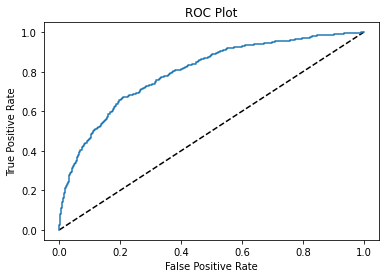

In [25]:
plt.plot([0, 1], [0, 1], 'k--')      # Adding baseline
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Plot")
plt.show()

### AUC

In [28]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(y_test, y_pred_prob)

0.7976790288997964

### Using AUC for Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cv_results = cross_val_score(logis, X_train, y_train, cv = 5, scoring = "roc_auc")
print(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[0.80167437 0.84521867 0.82774201 0.81489709 0.82660864]
Average 5-Fold CV Score: 0.8232281560733824


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Hyperparameter Tuning

## Grid Search Cross Validation

In [33]:
from sklearn.model_selection import GridSearchCV

### Setting Search Grid

In [2]:
import numpy as np
# Grid Search的傳入參數為dictionary
param_grid = {'n_neighbors': np.arange(1, 50)}
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

### Setting model

In [48]:
knn = KNeighborsClassifier()

### Performing Grid Search CV to choose the best combination of parameters

In [49]:
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
print("Result" + str(knn_cv))

ResultGridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})


### Fitting Model to Data

In [51]:
knn_cv.fit(X_train, y_train)
print("Tuned Knn Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_neighbors': 8}
Best score is 0.897414512093411


# Decision Tree with Randomised Search CV

## Import Necessary Modules

In [57]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

## Setup the parameters and distributions to sample from: param_dist

In [53]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

## Initiate Decision Tree classifer and performing Randomised Search CV

In [54]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EF01FAAF48>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EF00EFC5C8>})

## Print Results

In [58]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 8}
Best score is 0.9003202802602501
